In [1]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np


(230, 320, 3)
1.0


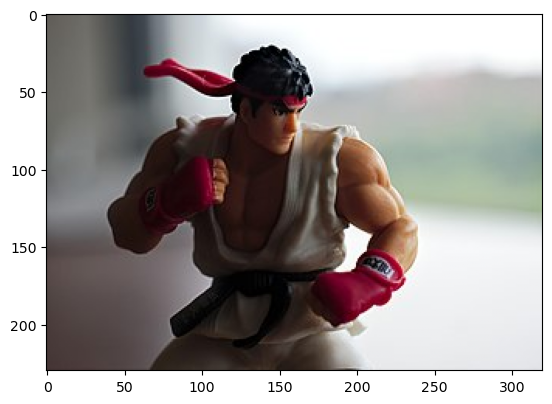

In [2]:
path = './imgs/img.jpg'
img = io.imread(path)/255.
print(img.shape)
plt.imshow(img)
print(np.asarray(img).max())

# Augmentation experiments

In [3]:
import torchvision.transforms as transforms
import albumentations as A
import numpy as np
from albumentations.pytorch import ToTensorV2

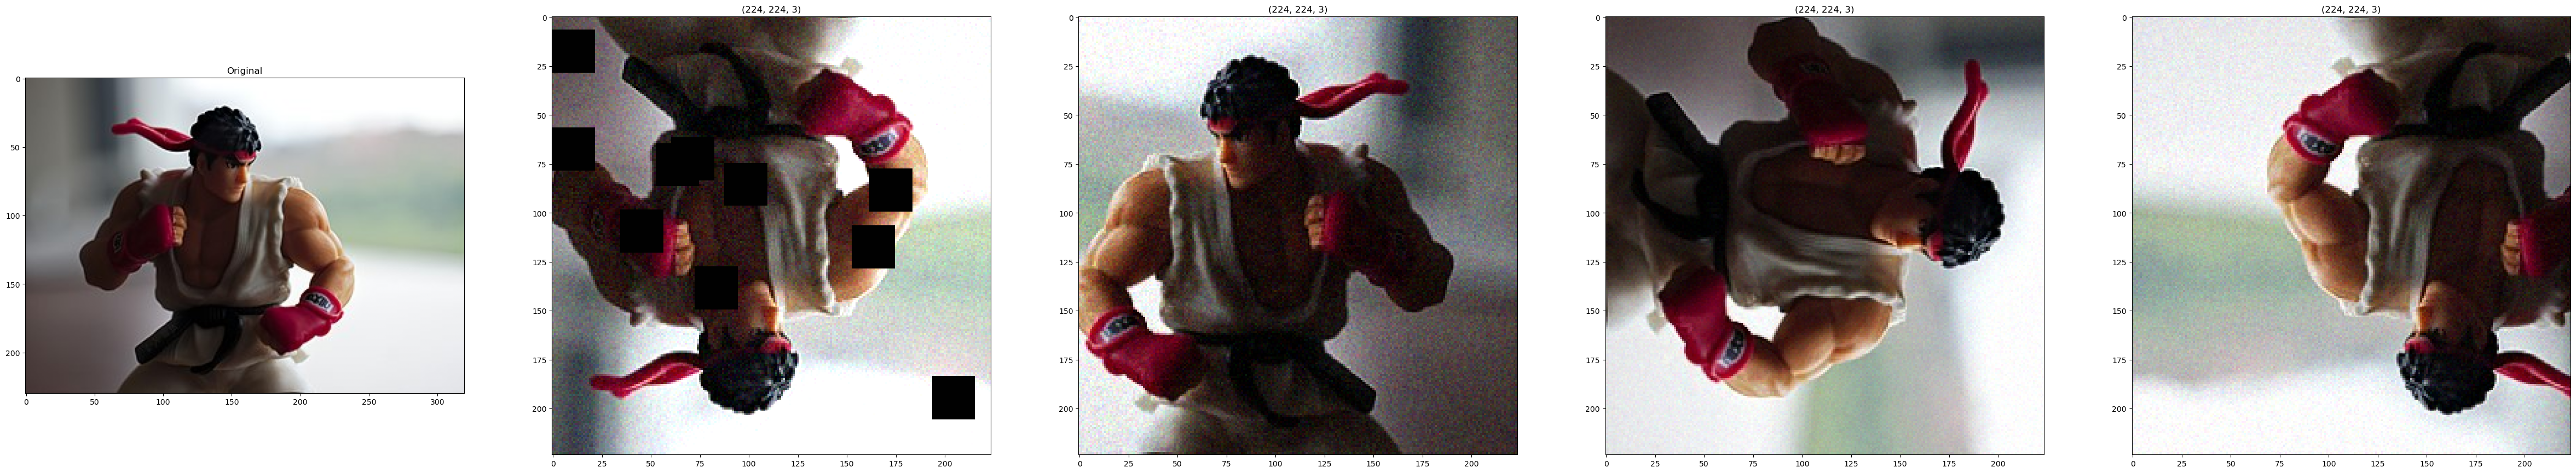

In [39]:
tfms = A.Compose([
    A.SmallestMaxSize(224),
    A.RandomCrop(height=224, width=224),
    A.GaussNoise(0.002, p=1),
    A.OneOf([
        A.RandomContrast(),
        A.RandomGamma()
    ], p=1),
    A.OneOf([

        A.IAAAffine(p=1),
    ], p=1),
    # Additional position augmentations
    A.RandomRotate90(p=.5),
    A.HorizontalFlip(p=.5),
    A.VerticalFlip(p=.5),
    A.Cutout(num_holes=10, fill_value=255,
             max_h_size=int(.1 * 224),
             max_w_size=int(.1 * 224),
             p=.1),
    ToTensorV2()
    ]
)

fig = plt.figure(figsize=(60, 60))
fig.add_subplot(1, 5, 1)
plt.imshow(img)
plt.title('Original')

for i in range(4):
    transformed = np.asarray(tfms(image=(img))['image']).transpose((1,2,0))
    fig.add_subplot(1, 5, i+2)
    plt.imshow((transformed*255).astype('uint8'))
    plt.title(transformed.shape)


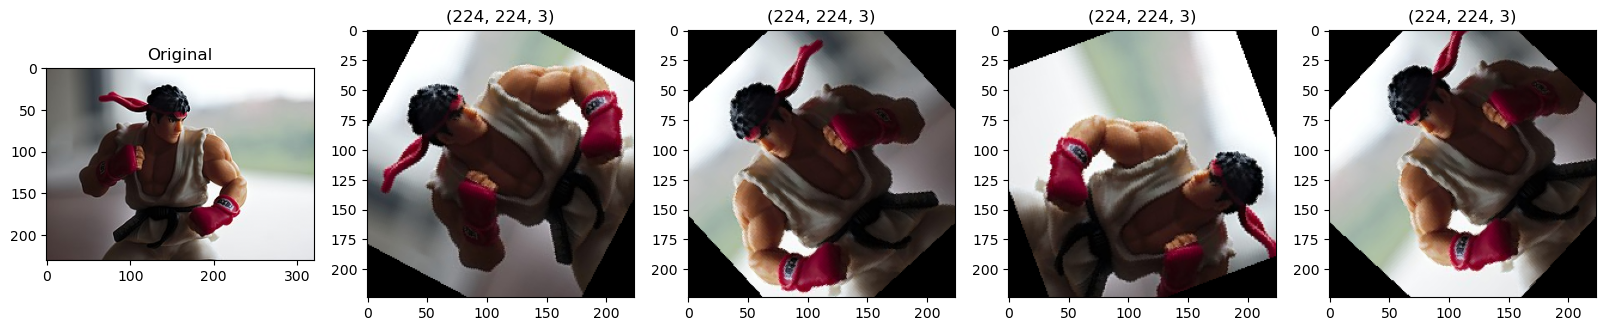

In [57]:
size = 224
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(size),
    transforms.RandomCrop(size=(size,size)),
    transforms.RandomRotation(degrees=90),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    # transforms.ToPILImage()
])

fig=plt.figure(figsize=(20, 20))
fig.add_subplot(1, 5, 1)
plt.imshow(img)
plt.title('Original')

for i in range(4):
    transformed = np.asarray(transform((img*255).astype('uint8'))).transpose((1,2,0))
    fig.add_subplot(1, 5, i+2)
    plt.imshow(transformed)
    plt.title(transformed.shape)

[0.0, 1.0]


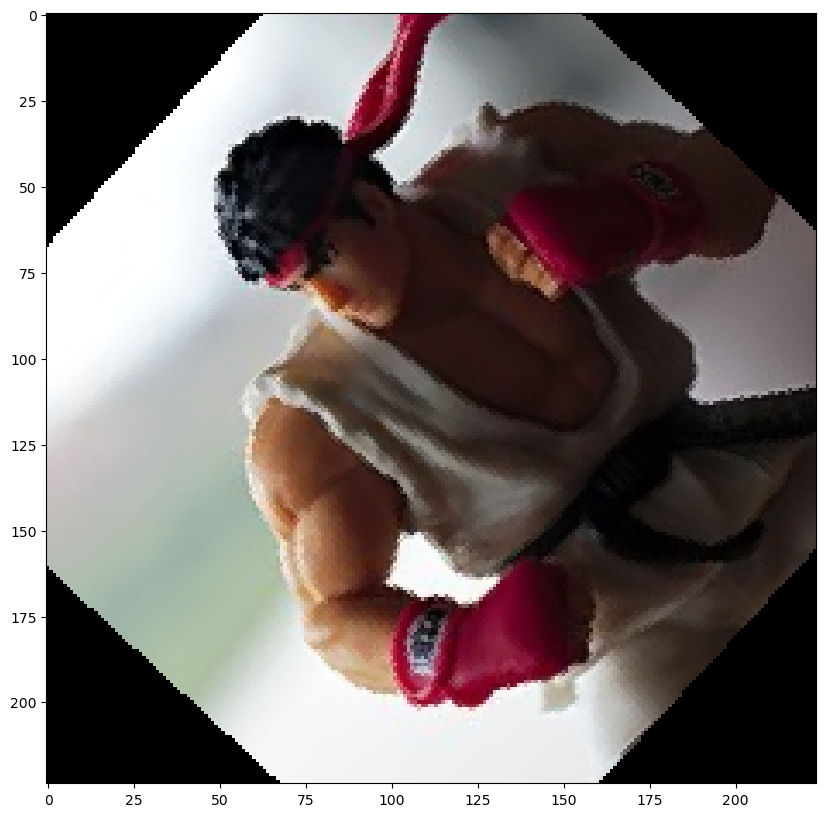

In [59]:
print('[{}, {}]'.format(transformed.min(), transformed.max()))
fig=plt.figure(figsize=(10, 10))
plt.imshow(transformed)